In [1]:
import time
start_time=time.time()
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import json

In [2]:
datapath_names = Path(open("path-name-list.txt", "r").read()).expanduser()

In [3]:
samples=pd.read_csv(str(datapath_names) +'//sample-names.csv',header=None)
samples

,0
0,TAU-N604-H
1,TAU-N604-O
2,TAU-N595-H
3,TAU-HV-H
4,TAU-HX-H
5,KPech-Orion-H
6,KPech-Orion-N
7,KPech-Orion-O
8,KPech-Orion-S
9,MUSE-Dor-H


In [4]:
Names=pd.read_csv(str(datapath_names) +'//formal-names.csv',header=None)
Names

,0
0,NGC 604
1,NGC 604 [OIII]
2,NGC 595
3,Hubble V
4,Hubble X
5,Orion
6,Orion [NII]
7,Orion [OIII]
8,Orion [SII]
9,30 Dor


Load results

In [5]:
datapath_res = Path(open("path-results.txt", "r").read()).expanduser()

In [6]:
data = {}
Results = {}

for i in range(len(samples)):
    data[samples[0][i]] = json.load(open(str(datapath_res) + '/' + samples[0][i] + ".json"))

In [7]:
for i in range(len(samples)):
    print(str(samples[0][i]) + ':',
          ' r0 = ' + str(np.round(data[samples[0][i]]['results_2sig']['r0'][0],4)) + ' pc,',
          ' s0 = ' + str(np.round(data[samples[0][i]]['results_2sig']['s0'][0],4)) + ' pc,',
    ' m = ' + str(np.round(data[samples[0][i]]['results_2sig']['m'][0],4)) + ',',
    ' sig2 = ' + str(np.round(data[samples[0][i]]['results_2sig']['sig2'][0],4)) + ' (km/s)^2,',
    ' noise = ' + str(np.round(data[samples[0][i]]['results_2sig']['noise'][0],4)) + ' (km/s)^2')

TAU-N604-H:  r0 = 12.0876 pc,  s0 = 2.1078 pc,  m = 0.7751,  sig2 = 85.8687 (km/s)^2,  noise = 0.3275 (km/s)^2
TAU-N604-O:  r0 = 8.9371 pc,  s0 = 3.5473 pc,  m = 0.7046,  sig2 = 107.6872 (km/s)^2,  noise = 0.3281 (km/s)^2
TAU-N595-H:  r0 = 11.2117 pc,  s0 = 0.4072 pc,  m = 1.3764,  sig2 = 53.2064 (km/s)^2,  noise = 1.5372 (km/s)^2
TAU-HV-H:  r0 = 3.562 pc,  s0 = 0.3412 pc,  m = 0.8104,  sig2 = 9.824 (km/s)^2,  noise = 0.0 (km/s)^2
TAU-HX-H:  r0 = 4.0994 pc,  s0 = 0.3624 pc,  m = 1.0161,  sig2 = 14.8123 (km/s)^2,  noise = 0.3211 (km/s)^2
KPech-Orion-H:  r0 = 0.068 pc,  s0 = 0.002 pc,  m = 1.0734,  sig2 = 12.648 (km/s)^2,  noise = 0.0252 (km/s)^2
KPech-Orion-N:  r0 = 0.0496 pc,  s0 = 0.0036 pc,  m = 0.6599,  sig2 = 11.8826 (km/s)^2,  noise = 0.028 (km/s)^2
KPech-Orion-O:  r0 = 0.0611 pc,  s0 = 0.0018 pc,  m = 1.1794,  sig2 = 10.9484 (km/s)^2,  noise = 0.025 (km/s)^2
KPech-Orion-S:  r0 = 0.0326 pc,  s0 = 0.0024 pc,  m = 0.7189,  sig2 = 8.6034 (km/s)^2,  noise = 0.0468 (km/s)^2
MUSE-Dor-H:

Results and confidence intervals

Create the columns for the values

In [8]:
#sigma
sig = [[0]*(1) for i in range(len(samples))]
siger = [[0]*(1) for i in range(len(samples))]

#velocity dispersion with 2-sig intervals
sig2 = [[0]*(1) for i in range(len(samples))]
#sig2er = [[0]*(1) for i in range(len(samples))]
sig2s2 = [[0]*(1) for i in range(len(samples))]
sig2s2p = [[0]*(1) for i in range(len(samples))]
sig2s2m = [[0]*(1) for i in range(len(samples))]

#correlation length with 2-sig intervals
r0 = [[0]*(1) for i in range(len(samples))]
#r0er = [[0]*(1) for i in range(len(samples))]
r0s2 = [[0]*(1) for i in range(len(samples))]
r0s2p = [[0]*(1) for i in range(len(samples))]
r0s2m = [[0]*(1) for i in range(len(samples))]

#power-law
m = [[0]*(1) for i in range(len(samples))]
#mer = [[0]*(1) for i in range(len(samples))]
ms2 = [[0]*(1) for i in range(len(samples))]
ms2p = [[0]*(1) for i in range(len(samples))]
ms2m = [[0]*(1) for i in range(len(samples))]

#noise with 2-sig intervals
bn = [[0]*(1) for i in range(len(samples))]
#ner = [[0]*(1) for i in range(len(samples))]
bns2 = [[0]*(1) for i in range(len(samples))]
bns2p = [[0]*(1) for i in range(len(samples))]
bns2m = [[0]*(1) for i in range(len(samples))]

#seeing with 2-sig intervals
s0 = [[0]*(1) for i in range(len(samples))]
#s0er = [[0]*(1) for i in range(len(samples))]
s0s2 = [[0]*(1) for i in range(len(samples))]
s0s2p = [[0]*(1) for i in range(len(samples))]
s0s2m = [[0]*(1) for i in range(len(samples))]

pc = [[0]*(1) for i in range(len(samples))]
box_size = [[0]*(1) for i in range(len(samples))]


Results to empty columns

In [9]:
for i in range(len(samples)):    
    
    sig2[i] = data[samples[0][i]]['results_2sig']['sig2'][0]
    sig2s2p[i] = data[samples[0][i]]['results_2sig']['sig2'][1]
    sig2s2m[i] = data[samples[0][i]]['results_2sig']['sig2'][2]
    
    r0[i]    = data[samples[0][i]]['results_2sig']['r0'][0]
    r0s2p[i] = data[samples[0][i]]['results_2sig']['r0'][1]
    r0s2m[i] = data[samples[0][i]]['results_2sig']['r0'][2]
    
    m[i]    = data[samples[0][i]]['results_2sig']['m'][0]
    ms2p[i] = data[samples[0][i]]['results_2sig']['m'][1]
    ms2m[i] = data[samples[0][i]]['results_2sig']['m'][2]
    
    bn[i]    = data[samples[0][i]]['results_2sig']['noise'][0]
    bns2p[i] = data[samples[0][i]]['results_2sig']['noise'][1]
    bns2m[i] = data[samples[0][i]]['results_2sig']['noise'][2]
    
    s0[i]    = data[samples[0][i]]['results_2sig']['s0'][0]
    s0s2p[i] = data[samples[0][i]]['results_2sig']['s0'][1]
    s0s2m[i] = data[samples[0][i]]['results_2sig']['s0'][2]
    
    box_size[i] = data[samples[0][i]]['properties']['box_size']
    pc[i] = data[samples[0][i]]['properties']['pc']

In [10]:
#pc[8]=pc[8]/60

Crate table

In [11]:
td = pd.DataFrame(
    {
       "A": sig2,
       "B": m,
       "C": r0,
       "E": bn,
       "F": s0,
        "G":  box_size,
        "H": np.array(box_size)/np.array(r0),
        "I": np.array(r0)/np.array(s0),
    },
)

<ipython-input-11-17d54d96c2d2>:10: RuntimeWarning: divide by zero encountered in true_divide
  "I": np.array(r0)/np.array(s0),


In [12]:
#td=td.sort_values( by='A', ascending=False)

In [13]:
SFres=td[['A','E','F','C','B','G','H','I']].copy()
SFres.rename(columns={'A':'$\sigma^2$ [km$^2$/s$^2$]',
                      'E':'$B_{noise}$ [km$^2$/s$^2$]',
                      'B':'$m$',
                      'C':'$r_0$ [pc]',
                      'F':'$s0$ (rms) [pc]',
                      'G':'L$_{box}$ [pc]',
                      'H':'L$_{box} / r_0$',
                      'I':'$r_0$/s0  ',},
                      inplace=True)

             
SFres.insert(loc=0, column='Region', value=Names)
SFres.round(4)

,Region,$\sigma^2$ [km$^2$/s$^2$],$B_{noise}$ [km$^2$/s$^2$],$s0$ (rms) [pc],$r_0$ [pc],$m$,L$_{box}$ [pc],L$_{box} / r_0$,$r_0$/s0
0,NGC 604,85.8687,0.3275,2.1078,12.0876,0.7751,173.4419,14.3487,5.7347
1,NGC 604 [OIII],107.6872,0.3281,3.5473,8.9371,0.7046,184.1883,20.6093,2.5194
2,NGC 595,53.2064,1.5372,0.4072,11.2117,1.3764,196.2758,17.5064,27.5306
3,Hubble V,9.8240,0.0000,0.3412,3.5620,0.8104,61.2194,17.1870,10.4410
4,Hubble X,14.8123,0.3211,0.3624,4.0994,1.0161,78.0350,19.0356,11.3124
5,Orion,12.6480,0.0252,0.0020,0.0680,1.0734,0.4541,6.6812,33.4837
6,Orion [NII],11.8826,0.0280,0.0036,0.0496,0.6599,0.4541,9.1519,13.8294
7,Orion [OIII],10.9484,0.0250,0.0018,0.0611,1.1794,0.4541,7.4275,33.8536
8,Orion [SII],8.6034,0.0468,0.0024,0.0326,0.7189,0.3411,10.4628,13.8078
9,30 Dor,297.5367,6.1556,0.1577,3.8579,0.8520,31.5129,8.1685,24.4639


Crate table with confidence intervals

In [14]:
s0f = pd.DataFrame(
    {
        "s0 [RMS]":s0,
        "s0+[RMS]": s0s2p,
        "s0-[RMS]": s0s2m,  
       "s0 [FWHM]": np.array(s0)*2.35/np.array(pc),
       "s0- [FWHM]": np.array(s0s2m)*2.35/np.array(pc),
       "s0+ [FWHM]": np.array(s0s2p)*2.35/np.array(pc),
        "bn ":bn,
        "bn+": bns2p,
        "bn- ": bns2m,     
    }
)

s0f.insert(loc=0, column='Region', value=Names)


s0f.round(4)

,Region,s0 [RMS],s0+[RMS],s0-[RMS],s0 [FWHM],s0- [FWHM],s0+ [FWHM],bn,bn+,bn-
0,NGC 604,2.1078,1.0353,0.7852,1.2163,0.4531,0.5974,0.3275,0.7014,0.3071
1,NGC 604 [OIII],3.5473,0.1089,1.6613,2.0470,0.9587,0.0628,0.3281,0.5894,0.2945
2,NGC 595,0.4072,0.6191,-0.0056,0.2350,-0.0032,0.3573,1.5372,1.7052,1.0506
3,Hubble V,0.3412,0.5335,0.0599,0.3307,0.0581,0.5172,0.0000,0.6477,-0.0098
4,Hubble X,0.3624,0.3295,0.1063,0.3513,0.1030,0.3194,0.3211,0.4153,0.2794
5,Orion,0.0020,0.0003,0.0002,2.3995,0.2473,0.3104,0.0252,0.0049,0.0049
6,Orion [NII],0.0036,0.0009,0.0004,4.2413,0.5092,1.0880,0.0280,0.0115,0.0141
7,Orion [OIII],0.0018,0.0002,0.0002,2.1349,0.2456,0.2889,0.0250,0.0042,0.0043
8,Orion [SII],0.0024,0.0009,0.0004,2.7911,0.4279,1.0218,0.0468,0.0193,0.0214
9,30 Dor,0.1577,0.0874,0.0452,1.5288,0.4383,0.8477,6.1556,1.5788,1.5700


In [15]:
s1f = pd.DataFrame(
    {
        "sig2":sig2,
        "sig2+": sig2s2p,
        "sig2-": sig2s2m,
        "r0":r0,
        "r0+": r0s2p,
        "r0-": r0s2m,
        "m":m,
        "m+": ms2p,
        "m-": ms2m,
       
    }
)

s1f.insert(loc=0, column='Region', value=Names)


s1f.round(4)

,Region,sig2,sig2+,sig2-,r0,r0+,r0-,m,m+,m-
0,NGC 604,85.8687,20.4180,11.4636,12.0876,6.4431,3.9551,0.7751,0.2074,0.2267
1,NGC 604 [OIII],107.6872,2.6300,29.2077,8.9371,6.7218,1.3169,0.7046,0.3177,0.0805
2,NGC 595,53.2064,4.6434,1.9165,11.2117,0.7392,0.8512,1.3764,0.0880,0.1493
3,Hubble V,9.8240,3.5090,0.4978,3.5620,0.4504,1.2587,0.8104,0.0922,0.2830
4,Hubble X,14.8123,2.6723,0.6829,4.0994,0.3259,0.1877,1.0161,0.0806,0.2222
5,Orion,12.6480,0.7428,0.5220,0.0680,0.0061,0.0041,1.0734,0.0312,0.0390
6,Orion [NII],11.8826,2.2241,0.6797,0.0496,0.0277,0.0059,0.6599,0.0576,0.1199
7,Orion [OIII],10.9484,0.4570,0.3574,0.0611,0.0036,0.0027,1.1794,0.0301,0.0353
8,Orion [SII],8.6034,2.4177,0.5551,0.0326,0.0268,0.0039,0.7189,0.0664,0.1631
9,30 Dor,297.5367,39.6113,18.5188,3.8579,1.0645,0.4682,0.8520,0.0778,0.1389


In [16]:
s1f.drop(1)

,Region,sig2,sig2+,sig2-,r0,r0+,r0-,m,m+,m-
0,NGC 604,85.868750,20.418004,11.463602,12.087616,6.443078,3.955140,0.775075,0.207397,0.226706
2,NGC 595,53.206356,4.643371,1.916528,11.211662,0.739236,0.851215,1.376368,0.087961,0.149309
3,Hubble V,9.824044,3.509014,0.497769,3.561965,0.450373,1.258744,0.810433,0.092176,0.283022
4,Hubble X,14.812259,2.672278,0.682873,4.099418,0.325858,0.187655,1.016097,0.080615,0.222241
5,Orion,12.648003,0.742833,0.521982,0.067959,0.006121,0.004111,1.073374,0.031151,0.038951
6,Orion [NII],11.882572,2.224148,0.679660,0.049613,0.027656,0.005946,0.659858,0.057572,0.119919
7,Orion [OIII],10.948360,0.457004,0.357372,0.061131,0.003597,0.002737,1.179374,0.030083,0.035339
8,Orion [SII],8.603377,2.417668,0.555106,0.032598,0.026775,0.003892,0.718935,0.066417,0.163061
9,30 Dor,297.536688,39.611347,18.518779,3.857852,1.064497,0.468204,0.851961,0.077782,0.138921
10,30 Dor [NII],425.899177,58.025678,83.666629,6.484121,3.153465,3.118540,0.500034,0.126812,-0.001196


In [17]:
marker_sample = ['o','o','o','o','o','^','^','^','^','s','s','s','s','s','^','^','^','^','^']


[None, Text(0, 0.5, 'r0 [pc]'), None, Text(0.5, 0, 'sig2 [km$^{2}$/s$^{2}$]')]

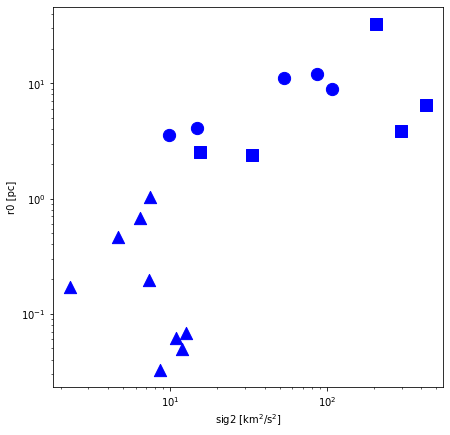

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))

errorsig2 = [s1f['sig2-'],s1f['sig2+']]
errorr0 = [s1f['r0-'],s1f['r0+']]

#ax.errorbar(s1f.sig2,s1f.r0, xerr = errorsig2, yerr = errorr0,  marker='o', linestyle=' ', markersize='7')

for xp, yp, m in zip(s1f.sig2, s1f.r0, marker_sample):
    plt.scatter(xp, yp, marker=m, s=150, color = 'blue')

ax.set(
    xscale="log",
    yscale="log",
    ylabel="r0 [pc]",
    xlabel=r"sig2 [km$^{2}$/s$^{2}$]",
)

In [19]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 8.722022771835327 seconds ---


In [20]:
!jupyter nbconvert --to script --no-prompt results-compiler.ipynb

[NbConvertApp] Converting notebook results-compiler.ipynb to script
[NbConvertApp] Writing 6229 bytes to results-compiler.py
